# Stohastično iskanje neusmerjenih enocikličnih grafov višjih redov

In [23]:
import networkx as nx
import random
from itertools import product
from itertools import combinations
import matplotlib.pyplot as plt

In [66]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_random_graphs_with_one_cycle(n, num_samples):
    graphs = []
    
    while len(graphs) < num_samples:
        k = random.randint(3, n)
    
        cycle_graph = nx.cycle_graph(k)
        remaining_nodes = list(range(k, n))
        
        full_graph = cycle_graph.copy()
        attached_nodes = set(range(k))  
        for node in remaining_nodes:
            parent = random.choice(list(attached_nodes)) # Izberemo naključno vozlišče, ki je že del grafa, kot začetnika
            full_graph.add_edge(parent, node)
            attached_nodes.add(node)  # Dodamo novo vozlišče v množico priključenih
        
        # Pogoji
        if len(list(nx.cycle_basis(full_graph))) == 1:
            is_isomorphic = any(nx.is_isomorphic(full_graph, g) for g in graphs)
            if not is_isomorphic:
                graphs.append(full_graph)
    
    return graphs

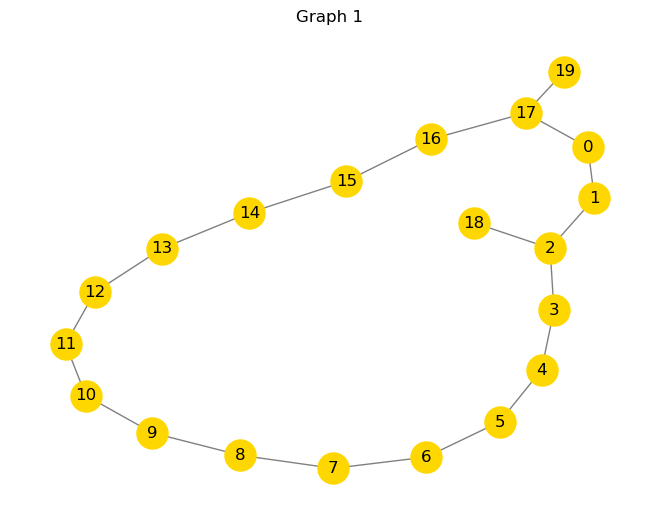

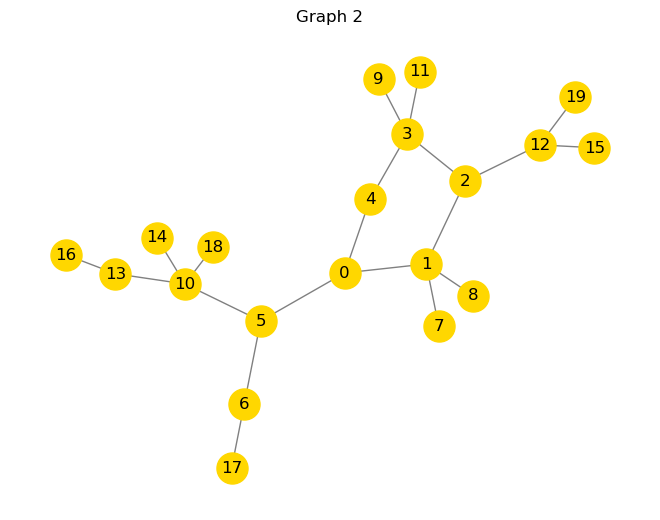

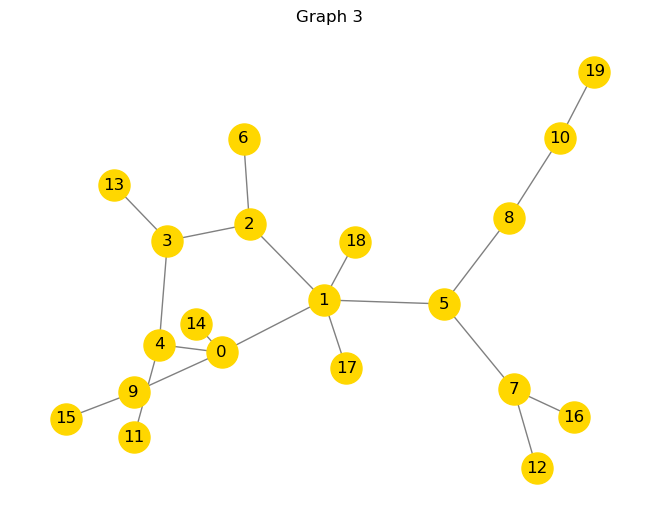

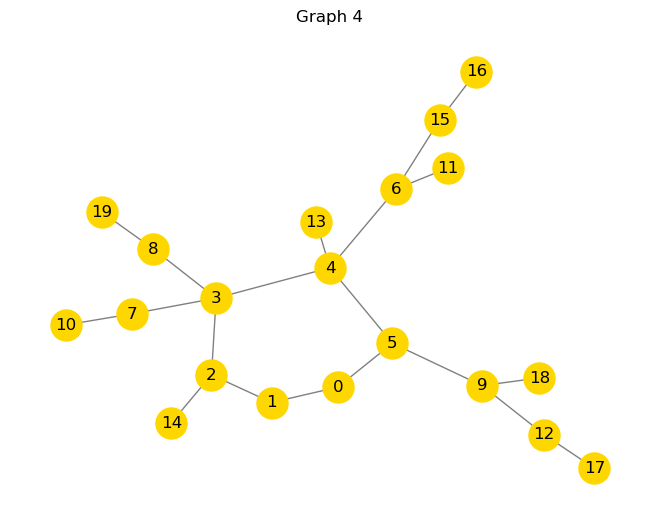

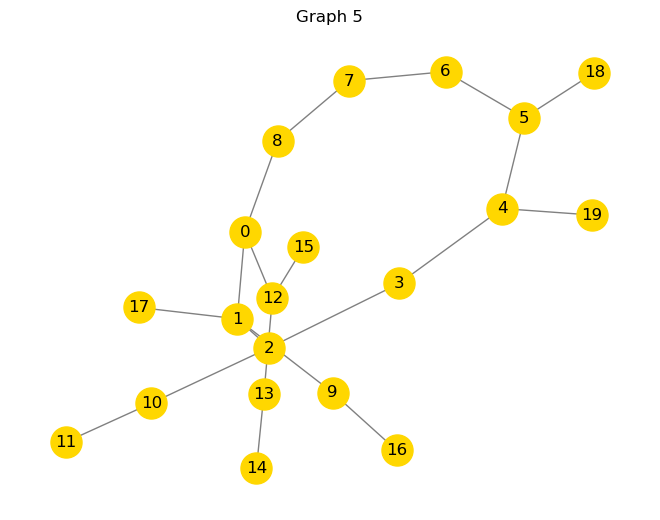

In [72]:
n = 20
num_samples = 5  
graphs_stohastic = generate_random_graphs_with_one_cycle(n, num_samples)


for i, graph in enumerate(graphs_stohastic):
    plt.figure()
    nx.draw(graph, with_labels = True, node_color = 'gold' , node_size = 500, edge_color = 'gray')
    plt.title(f"Graph {i + 1}")
    plt.show()